In [35]:
import numpy as np
import pandas as pd
from typing import Optional

class MeanBaseline:
    def __init__(self) -> None:
        self.mean = None

    def fit(self, dataframe: pd.DataFrame, window: Optional[int] = None) -> None:
        """
        Fit the MeanBaseline model to the input DataFrame.

        Args:
            dataframe (pd.DataFrame): The input DataFrame.
            window (int, optional): The size of the rolling window. If not provided, the window size is set to the
                                    number of rows in the DataFrame.

        Returns:
            None
        """
        if window is None:
            window = dataframe.shape[0]

        self.mean = dataframe.rolling(window).mean()

    def predict(self, length: int) -> pd.DataFrame:
        """
        Generate predictions using the MeanBaseline model.

        Args:
            length (int): The number of predictions to generate.

        Returns:
            pd.DataFrame: The predicted values.
        """
        array = np.ones(shape=(length, self.mean.shape[1]))
        result = array * np.array(self.mean.iloc[-1, :])
        result = pd.DataFrame(result)
        return result


In [36]:
class OffsetBaseline:
    def __init__(self) -> None:
        self.offset = None

    def fit(self, dataframe: pd.DataFrame, offset: int) -> None:
        """
        Fit the OffsetBaseline model to the input DataFrame.

        Args:
            dataframe (pd.DataFrame): The input DataFrame.
            offset (int): Model is looking back with offset on trained data

        Returns:
            None
        """

        self.offset = dataframe.offset(offset) # CONTINUE HERE!!!!!!!!!

    def predict(self, length: int) -> pd.DataFrame:
        """
        Generate predictions using the MeanBaseline model.

        Args:
            length (int): The number of predictions to generate.

        Returns:
            pd.DataFrame: The predicted values.
        """
        array = np.ones(shape=(length, self.mean.shape[1]))
        result = array * np.array(self.mean.iloc[-1, :])
        result = pd.DataFrame(result)
        return result


In [37]:
df = pd.read_pickle('../data/final_dataframe.pkl')

In [38]:
df.drop('normalisation_factor', axis=1, inplace=True)

In [39]:
df

,Date,Photovoltaics [MWh] Original resolutions,Photovoltaics [MW] Calculated resolutions,Total (grid load) [MWh] Original resolutions,Germany/Luxembourg [€/MWh] Calculated resolutions,Solar_generation_MWh_normalized
0,2018-10-01 00:00:00,0.0,42805.0,10589.75,59.53,0.0
1,2018-10-01 00:15:00,0.0,42805.0,10589.75,59.53,0.0
2,2018-10-01 00:30:00,0.0,42805.0,10589.75,59.53,0.0
3,2018-10-01 00:45:00,0.0,42805.0,10589.75,59.53,0.0
4,2018-10-01 01:00:00,0.0,42805.0,10589.75,56.10,0.0
...,...,...,...,...,...,...
163675,2023-06-01 22:45:00,0.0,62579.0,12945.50,95.41,0.0
163676,2023-06-01 23:00:00,0.0,62579.0,12817.75,86.53,0.0
163677,2023-06-01 23:15:00,0.0,62579.0,12539.00,86.53,0.0
163678,2023-06-01 23:30:00,0.0,62579.0,12371.00,86.53,0.0


In [40]:
column_names = ['date','pv_orig','pv_installed','consumption','price','pv_norm']

In [41]:
df.columns = column_names

In [57]:
df.describe()

,date,pv_orig,pv_installed,consumption,price,pv_norm
count,163680,163680.000000,163680.000000,163680.000000,163680.000000,163680.000000
mean,2021-01-30 11:25:53.753666048,1317.171841,51877.263978,14185.096180,97.992623,1584.258910
min,2018-10-01 00:00:00,0.000000,42805.000000,7471.000000,-129.960000,0.000000
25%,2019-12-01 04:56:15,0.000000,45435.000000,12179.500000,34.960000,0.000000
50%,2021-01-30 10:52:30,13.750000,53538.000000,14128.500000,53.110000,16.816748
75%,2022-04-01 17:48:45,2042.750000,58002.000000,16173.750000,119.962500,2485.099555
max,2023-06-01 23:45:00,10249.000000,62579.000000,20542.500000,871.000000,10770.803678
std,NaN,2073.171930,5898.121075,2455.453971,108.509004,2473.386880


In [43]:
#df.set_index('date',inplace=True, drop=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163680 entries, 0 to 163679
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          163680 non-null  datetime64[ns]
 1   pv_orig       163680 non-null  float64       
 2   pv_installed  163680 non-null  float64       
 3   consumption   163680 non-null  float64       
 4   price         163680 non-null  float64       
 5   pv_norm       163680 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 7.5 MB


In [328]:
baseline_model = MeanBaseline()

In [329]:
baseline_model.fit(df[['price','pv_norm', 'consumption']], window=24*4)

In [330]:
df_predictions = pd.DataFrame(baseline_model.predict(24*4))

In [331]:
df_predictions.columns = ['pred_price', 'pred_pv_norm', 'pred_consumption']

In [332]:
df_new = pd.concat([df.reset_index(drop=True),df_predictions],ignore_index=True)

In [333]:
df_new.isnull().sum()

date                    96
pv_orig                 96
pv_installed            96
consumption             96
price                   96
pv_norm                 96
pred_price          163680
pred_pv_norm        163680
pred_consumption    163680
dtype: int64

In [431]:
while df_new.isnull().sum()[0] > 0:
    df_new['date'] = df_new['date'].fillna(df_new['date'].shift() + pd.Timedelta(minutes=15))

In [432]:
df_new.isnull().sum()

date                     0
pv_orig                 96
pv_installed            96
consumption             96
price                   96
pv_norm                 96
pred_price          163680
pred_pv_norm        163680
pred_consumption    163680
dtype: int64

In [433]:
df_new.drop(['pv_orig','price','pred_price','pv_installed', 'pv_norm', 'pred_pv_norm',  ],inplace=True,axis=1)

In [434]:
df_new.set_index('date',inplace=True, drop=True)

In [435]:
df_plotting = df_new.tail(500)

In [326]:
import matplotlib.pyplot as plt

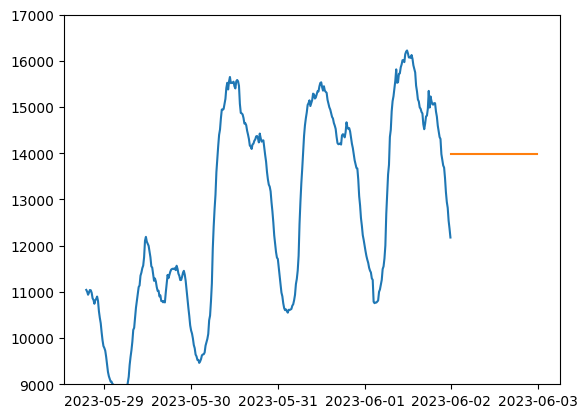

In [440]:
fig = plt.figure()
ax = plt.subplot()
plt.plot(df_plotting)
plt.ylim(9000,17000)
#plt.xlim()
plt.show()